/home/x/miniconda3/envs/obspy/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


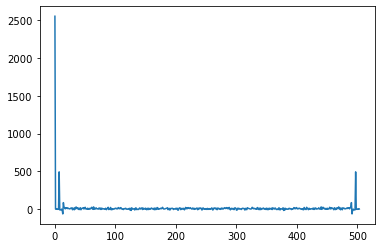

In [7]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt


def synthetic_timeseries(t):
    T1 = 12.4*60
    T2 = 24*60
    T3 = 15*24*60
    pnoise = 0.30;
    yt = 5 + 3*np.cos(2*np.pi*t/T1) + 2*np.cos(2*np.pi*t/T2) + 1*np.cos(2*np.pi*t/T3)
    yt = yt + pnoise*max(yt-np.mean(yt))*(0.5 - np.random.rand(np.size(yt)))
    return yt

dT = 20                                     # sampling rate
duration = 7*24*60                          # 7-day data
t = np.arange(0, duration, dT)
yt = synthetic_timeseries(t)
# plt.plot(t, yt)

yf = fft.fft(yt)

plt.plot(yf)

In [8]:
yf

array([ 2.55460125e+03+0.00000000e+00j, -4.79659056e-01-1.94534101e+02j,
       -4.08270893e+00-7.75332150e+01j,  3.68008979e+00-4.79392898e+01j,
       -4.70369568e+00-2.60633593e+01j, -3.42107991e+00-4.84068106e+00j,
       -4.66784049e+00-1.12967674e+00j,  4.91733890e+02+7.51006380e+00j,
       -1.22381851e+01+6.75855504e+00j, -1.17254927e+01+2.72919967e+01j,
       -1.31667762e+01+4.18104723e+01j, -1.85721431e+00+5.37645958e+01j,
       -1.22032102e+01+1.14994074e+02j, -6.54177807e+01+4.12874887e+02j,
        8.42419783e+01-5.55180589e+02j,  2.24396620e+01-1.82956901e+02j,
        1.85210619e+01-1.23619350e+02j,  1.81752183e+00-7.28278165e+01j,
        1.57647429e+01-5.86346792e+01j,  7.90319282e+00-5.55898096e+01j,
        1.52129181e+01-4.73904491e+01j,  5.50619047e+00-3.88904093e+01j,
        1.06905847e+01-4.21302849e+01j,  4.96813975e+00-3.18448148e+01j,
        2.29936968e+00-2.53709332e+01j,  1.41379962e+00-3.17726102e+01j,
        1.10663301e+01-2.76036178e+01j,  1.03201000

In [10]:
npts = len(yf)
np.fft.fftshift(np.fft.fft(yf, 2*npts-1))[npts-1:2*npts]

array([ 5.47044371e+03-3.12638804e-13j,  2.54643619e+03-5.23441934e+03j,
        1.63928208e+03+2.85558024e+00j,  2.54133285e+03-2.83533126e+03j,
        1.74018806e+03+5.08160416e+00j,  2.53701038e+03-2.25537182e+03j,
        1.54641216e+03+9.43618251e+00j,  2.53602295e+03-1.70137551e+03j,
        1.50138733e+03+1.31437572e+01j,  2.53674747e+03-1.27165318e+03j,
        1.42387436e+03+1.76393815e+01j,  2.54472369e+03-5.75604505e+02j,
        2.08105276e+03+8.86516528e+00j,  2.53618436e+03-9.08077556e+02j,
        1.74632038e+03+1.76542711e+01j,  2.54340426e+03-4.78454012e+02j,
        1.82590103e+03+1.81907027e+01j,  2.55539473e+03+2.99152655e+01j,
        2.48412314e+03+1.97938980e+00j,  2.54715616e+03-2.51130077e+02j,
        2.53388654e+03+6.46457723e-01j,  2.54600432e+03-2.62348338e+02j,
        2.64687392e+03-3.16779234e+00j,  2.54272635e+03-3.30845620e+02j,
        2.60652448e+03-1.94476128e+00j,  2.54865196e+03-1.52480683e+02j,
        2.80004854e+03-9.96001977e+00j,  2.55579933

In [16]:
len(np.fft.fft(yf, 2*npts-1))

1007

In [25]:
len(np.fft.fft(yf))
# print(len())

504

In [43]:
xf = fft.fftfreq(2*npts, dT)
print(len(xf))
# plt.plot(xf, yf)
xf


1008


array([ 0.00000000e+00,  4.96031746e-05,  9.92063492e-05, ...,
       -1.48809524e-04, -9.92063492e-05, -4.96031746e-05])

In [42]:
xf = fft.fftfreq(npts, dT)
print(len(xf))
# plt.plot(xf, yf)
xf


504


array([ 0.00000000e+00,  9.92063492e-05,  1.98412698e-04,  2.97619048e-04,
        3.96825397e-04,  4.96031746e-04,  5.95238095e-04,  6.94444444e-04,
        7.93650794e-04,  8.92857143e-04,  9.92063492e-04,  1.09126984e-03,
        1.19047619e-03,  1.28968254e-03,  1.38888889e-03,  1.48809524e-03,
        1.58730159e-03,  1.68650794e-03,  1.78571429e-03,  1.88492063e-03,
        1.98412698e-03,  2.08333333e-03,  2.18253968e-03,  2.28174603e-03,
        2.38095238e-03,  2.48015873e-03,  2.57936508e-03,  2.67857143e-03,
        2.77777778e-03,  2.87698413e-03,  2.97619048e-03,  3.07539683e-03,
        3.17460317e-03,  3.27380952e-03,  3.37301587e-03,  3.47222222e-03,
        3.57142857e-03,  3.67063492e-03,  3.76984127e-03,  3.86904762e-03,
        3.96825397e-03,  4.06746032e-03,  4.16666667e-03,  4.26587302e-03,
        4.36507937e-03,  4.46428571e-03,  4.56349206e-03,  4.66269841e-03,
        4.76190476e-03,  4.86111111e-03,  4.96031746e-03,  5.05952381e-03,
        5.15873016e-03,  

In [30]:
n = len(yf)
print(yf[0:n//2])


[ 2.55460125e+03+0.00000000e+00j -4.79659056e-01-1.94534101e+02j
 -4.08270893e+00-7.75332150e+01j  3.68008979e+00-4.79392898e+01j
 -4.70369568e+00-2.60633593e+01j -3.42107991e+00-4.84068106e+00j
 -4.66784049e+00-1.12967674e+00j  4.91733890e+02+7.51006380e+00j
 -1.22381851e+01+6.75855504e+00j -1.17254927e+01+2.72919967e+01j
 -1.31667762e+01+4.18104723e+01j -1.85721431e+00+5.37645958e+01j
 -1.22032102e+01+1.14994074e+02j -6.54177807e+01+4.12874887e+02j
  8.42419783e+01-5.55180589e+02j  2.24396620e+01-1.82956901e+02j
  1.85210619e+01-1.23619350e+02j  1.81752183e+00-7.28278165e+01j
  1.57647429e+01-5.86346792e+01j  7.90319282e+00-5.55898096e+01j
  1.52129181e+01-4.73904491e+01j  5.50619047e+00-3.88904093e+01j
  1.06905847e+01-4.21302849e+01j  4.96813975e+00-3.18448148e+01j
  2.29936968e+00-2.53709332e+01j  1.41379962e+00-3.17726102e+01j
  1.10663301e+01-2.76036178e+01j  1.03201000e+01-4.77115125e+01j
  1.51546416e+01-2.77038124e+01j -1.00807040e+01-5.00711390e+00j
  1.13853046e+01-2.215111

In [32]:
print(yf[n//2:n])

[ 8.48941562e+00+1.99840144e-15j -6.10589402e+00-1.11214614e+01j
  4.93631477e+00+8.21002560e+00j -4.37167719e+00+7.47981591e+00j
  5.19201731e+00+7.18113506e+00j -4.06252102e+00+6.14454624e+00j
 -1.57250813e+00+1.76137379e+00j  1.39005289e+01+8.48904184e-01j
  8.24403415e+00-9.45984618e+00j -1.41198852e+01+4.75360415e+00j
  7.61739447e+00-4.13443290e+00j  1.18439191e+01+1.19191914e+01j
  4.83745503e+00+1.24490257e+01j  1.26978339e+01+1.46524718e+01j
 -4.69783547e-01+2.07369508e+01j  9.83620859e+00+1.53012151e+00j
 -9.80264574e+00-3.87291020e+00j  1.13965745e+01-2.64305939e+00j
  1.09976040e+01-5.85670677e+00j  1.19663152e-01+2.11350752e+00j
 -1.50842082e+00-1.18444942e+00j  8.48872103e+00+4.60527910e+00j
 -5.33931608e+00+2.16151149e+00j  2.54569894e+00-2.07492431e+00j
  1.41255579e+01+1.28453521e+01j -3.19297764e-01+1.32375027e+01j
 -2.76300706e-01-3.29524380e+00j  6.09325020e+00-2.40206557e+00j
  1.72838523e+01+1.05492383e+01j  8.58629181e+00+1.73542864e+00j
  6.51573552e+00+5.987078

In [34]:
print(fft.fftshift(yf))
x = fft.fftshift(yf)

[ 8.48941562e+00+1.99840144e-15j -6.10589402e+00-1.11214614e+01j
  4.93631477e+00+8.21002560e+00j -4.37167719e+00+7.47981591e+00j
  5.19201731e+00+7.18113506e+00j -4.06252102e+00+6.14454624e+00j
 -1.57250813e+00+1.76137379e+00j  1.39005289e+01+8.48904184e-01j
  8.24403415e+00-9.45984618e+00j -1.41198852e+01+4.75360415e+00j
  7.61739447e+00-4.13443290e+00j  1.18439191e+01+1.19191914e+01j
  4.83745503e+00+1.24490257e+01j  1.26978339e+01+1.46524718e+01j
 -4.69783547e-01+2.07369508e+01j  9.83620859e+00+1.53012151e+00j
 -9.80264574e+00-3.87291020e+00j  1.13965745e+01-2.64305939e+00j
  1.09976040e+01-5.85670677e+00j  1.19663152e-01+2.11350752e+00j
 -1.50842082e+00-1.18444942e+00j  8.48872103e+00+4.60527910e+00j
 -5.33931608e+00+2.16151149e+00j  2.54569894e+00-2.07492431e+00j
  1.41255579e+01+1.28453521e+01j -3.19297764e-01+1.32375027e+01j
 -2.76300706e-01-3.29524380e+00j  6.09325020e+00-2.40206557e+00j
  1.72838523e+01+1.05492383e+01j  8.58629181e+00+1.73542864e+00j
  6.51573552e+00+5.987078

/home/x/miniconda3/envs/obspy/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


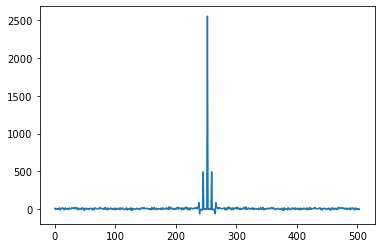

In [35]:
print(fft.fftshift(yf))

In [38]:
np.fft.fftshift(np.fft.fft(yf, 2*npts-1))[npts-1:2*npts]



array([ 5.47044371e+03-3.12638804e-13j,  2.54643619e+03-5.23441934e+03j,
        1.63928208e+03+2.85558024e+00j,  2.54133285e+03-2.83533126e+03j,
        1.74018806e+03+5.08160416e+00j,  2.53701038e+03-2.25537182e+03j,
        1.54641216e+03+9.43618251e+00j,  2.53602295e+03-1.70137551e+03j,
        1.50138733e+03+1.31437572e+01j,  2.53674747e+03-1.27165318e+03j,
        1.42387436e+03+1.76393815e+01j,  2.54472369e+03-5.75604505e+02j,
        2.08105276e+03+8.86516528e+00j,  2.53618436e+03-9.08077556e+02j,
        1.74632038e+03+1.76542711e+01j,  2.54340426e+03-4.78454012e+02j,
        1.82590103e+03+1.81907027e+01j,  2.55539473e+03+2.99152655e+01j,
        2.48412314e+03+1.97938980e+00j,  2.54715616e+03-2.51130077e+02j,
        2.53388654e+03+6.46457723e-01j,  2.54600432e+03-2.62348338e+02j,
        2.64687392e+03-3.16779234e+00j,  2.54272635e+03-3.30845620e+02j,
        2.60652448e+03-1.94476128e+00j,  2.54865196e+03-1.52480683e+02j,
        2.80004854e+03-9.96001977e+00j,  2.55579933

In [39]:
np.fft.fft(yf, 2*npts-1)[0:npts]
np.fft.fft()

array([ 5.47044371e+03-3.12638804e-13j,  2.54643619e+03-5.23441934e+03j,
        1.63928208e+03+2.85558024e+00j,  2.54133285e+03-2.83533126e+03j,
        1.74018806e+03+5.08160416e+00j,  2.53701038e+03-2.25537182e+03j,
        1.54641216e+03+9.43618251e+00j,  2.53602295e+03-1.70137551e+03j,
        1.50138733e+03+1.31437572e+01j,  2.53674747e+03-1.27165318e+03j,
        1.42387436e+03+1.76393815e+01j,  2.54472369e+03-5.75604505e+02j,
        2.08105276e+03+8.86516528e+00j,  2.53618436e+03-9.08077556e+02j,
        1.74632038e+03+1.76542711e+01j,  2.54340426e+03-4.78454012e+02j,
        1.82590103e+03+1.81907027e+01j,  2.55539473e+03+2.99152655e+01j,
        2.48412314e+03+1.97938980e+00j,  2.54715616e+03-2.51130077e+02j,
        2.53388654e+03+6.46457723e-01j,  2.54600432e+03-2.62348338e+02j,
        2.64687392e+03-3.16779234e+00j,  2.54272635e+03-3.30845620e+02j,
        2.60652448e+03-1.94476128e+00j,  2.54865196e+03-1.52480683e+02j,
        2.80004854e+03-9.96001977e+00j,  2.55579933